# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = 'https://api.openweathermap.org/data/2.5/weather?q=' + city +'&appid=' + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tobol
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | redencao
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | drawsko pomorskie
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | susuman
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | kirando
Processing Record 20 of Set 1 | porto novo
Processing Record 21 of Set 1 | jaisalmer
Processing Record 22 of Set 1 | natal
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          610
Lat           610
Lng           610
Max Temp      610
Humidity      610
Cloudiness    610
Wind Speed    610
Country       610
Date          610
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tobol,52.6844,62.5794,262.02,99,68,1.97,KZ,1738433540
1,olonkinbyen,70.9221,-8.7187,273.74,94,100,18.98,SJ,1738433541
2,redencao,-4.2258,-38.7306,305.85,40,78,4.59,BR,1738433543
3,udachny,66.4167,112.4000,235.75,100,99,2.14,RU,1738433544
4,port-aux-francais,-49.3500,70.2167,278.31,78,89,4.34,TF,1738433545


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tobol,52.6844,62.5794,262.02,99,68,1.97,KZ,1738433540
1,olonkinbyen,70.9221,-8.7187,273.74,94,100,18.98,SJ,1738433541
2,redencao,-4.2258,-38.7306,305.85,40,78,4.59,BR,1738433543
3,udachny,66.4167,112.4000,235.75,100,99,2.14,RU,1738433544
4,port-aux-francais,-49.3500,70.2167,278.31,78,89,4.34,TF,1738433545


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

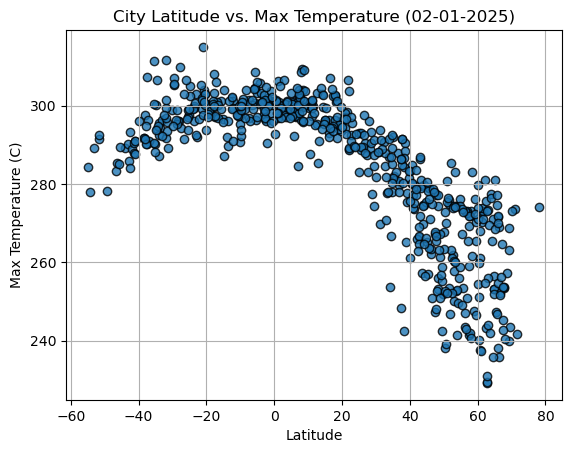

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    edgecolor='black',
    linewidths=1,
    marker = 'o',
    alpha=0.8,
    label='Cities'
)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%m-%d-%Y'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

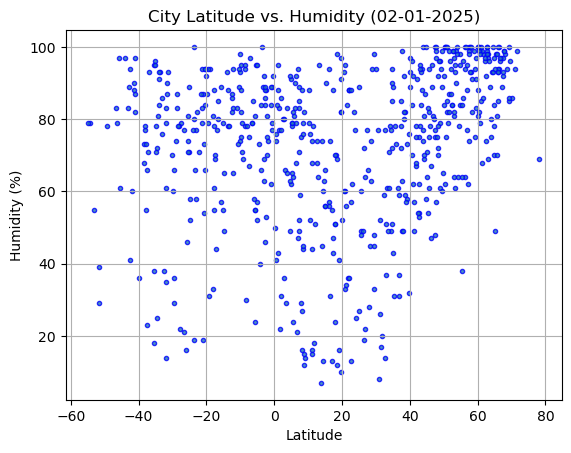

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    edgecolor='blue',
    linewidths=1,
    marker = '.',
    alpha=0.8,
    label='Cities'
)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%m-%d-%Y'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

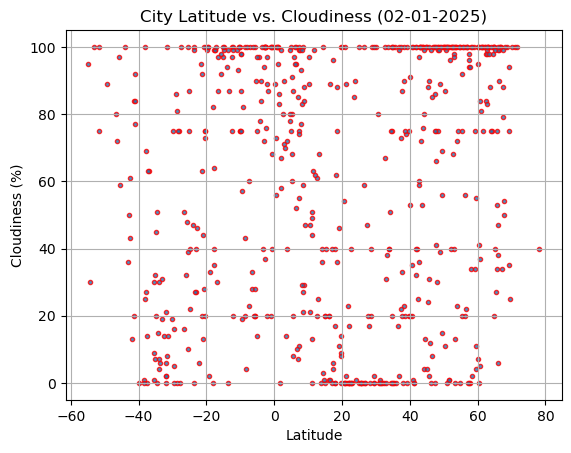

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    edgecolor='red',
    linewidths=1,
    marker = '.',
    alpha=0.8,
    label='Cities'
)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%m-%d-%Y'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

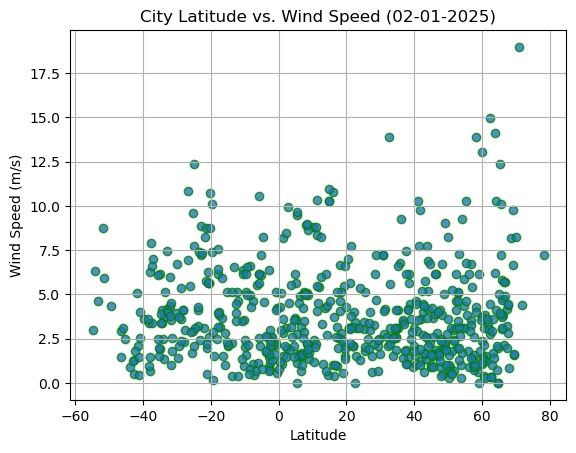

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    edgecolor='green',
    linewidths=1,
    marker = 'o',
    alpha=0.8,
    label='Cities'
)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%m-%d-%Y'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values + slope + intercept
    line = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values)
    plt.annotate(line, text_coordinates, fontsize=14, color="purple")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title(f'Latitude vs. {title}')
    print(f'The r^2-value is: {rvalue**2}')
    plt.show()

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tobol,52.6844,62.5794,262.02,99,68,1.97,KZ,1738433540
1,olonkinbyen,70.9221,-8.7187,273.74,94,100,18.98,SJ,1738433541
3,udachny,66.4167,112.4000,235.75,100,99,2.14,RU,1738433544
6,yellowknife,62.4560,-114.3525,243.38,92,84,4.47,CA,1738433547
8,anadyr,64.7500,177.4833,256.43,84,100,2.00,RU,1738433550


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,redencao,-4.2258,-38.7306,305.85,40,78,4.59,BR,1738433543
4,port-aux-francais,-49.3500,70.2167,278.31,78,89,4.34,TF,1738433545
5,waitangi,-43.9535,-176.5597,289.16,97,100,0.89,NZ,1738433546
7,port alfred,-33.5906,26.8910,294.36,93,6,5.16,ZA,1738433548
9,port elizabeth,-33.9180,25.5701,295.55,91,7,1.34,ZA,1738433551


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7020068426501708


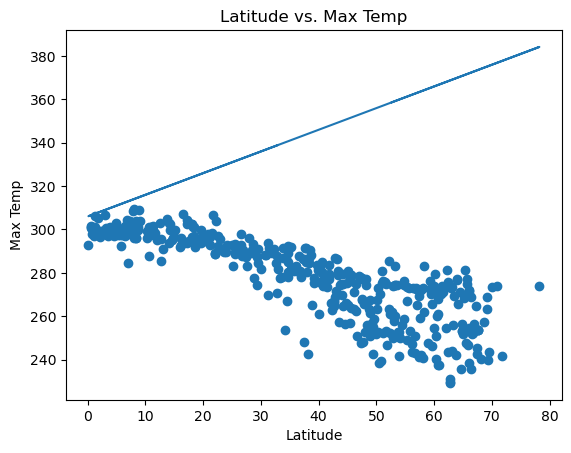

In [71]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression(x_values, y_values, 'Max Temp', (6, 0))

The r^2-value is: 0.27071148681570206


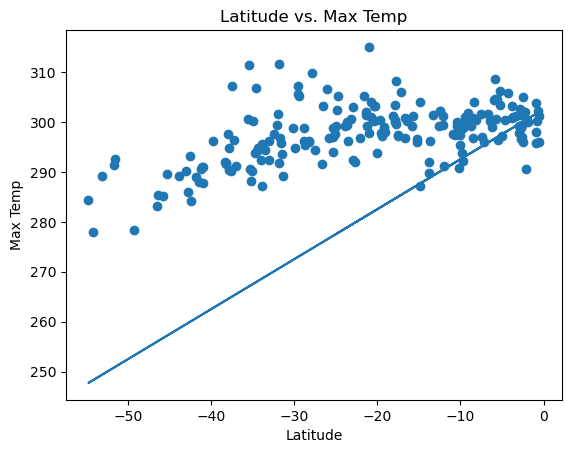

In [72]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (280, -50))

**Discussion about the linear relationship:** The low r2 value indicates a weak correlation between latitude and the maximum temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.24265181287291218


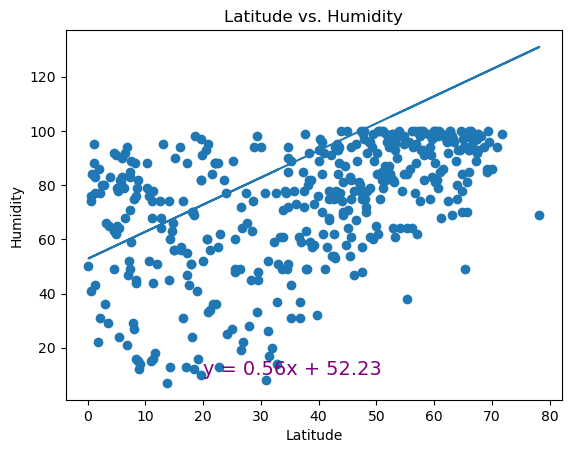

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values, 'Humidity', (20, 10))

The r^2-value is: 0.016500979377484362


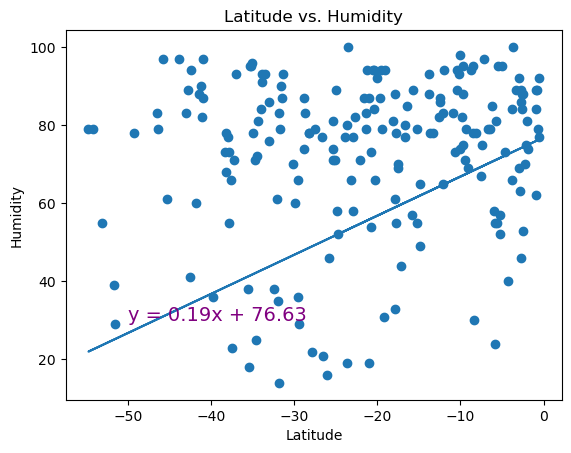

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values, y_values, 'Humidity', (-50, 30))

**Discussion about the linear relationship:** The low r2 values indicate a weak or no correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0407553657441627


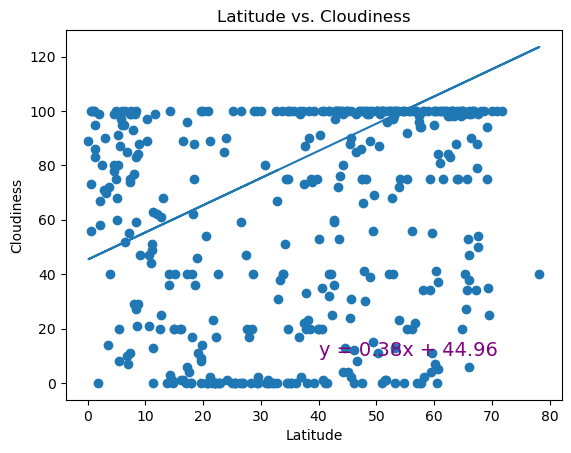

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r^2-value is: 0.09144163542226953


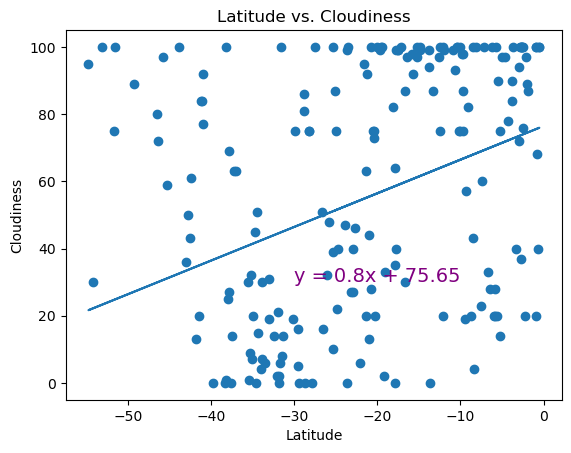

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** The low r2 values indicate a weak or no correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 1.023615207939298e-05


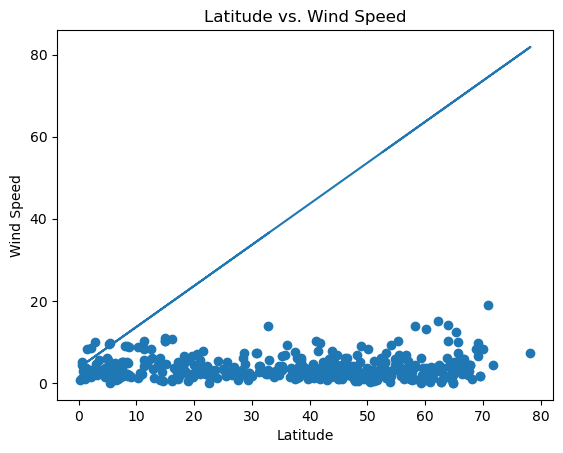

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, 'Wind Speed', (-30, 30))

The r^2-value is: 0.0043671021185017036


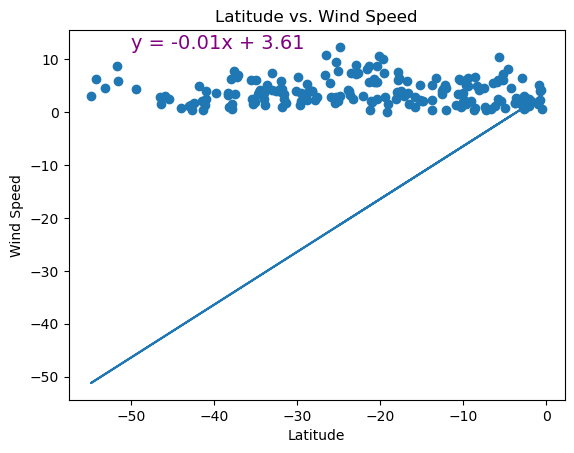

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, 'Wind Speed', (-50, 12))

**Discussion about the linear relationship:** The low r2 values indicate a weak or no correlation between latitude and wind speed. 